# Examples for pyoculus
## 1. Import pyoculus and the solvers

In [1]:
import numpy as np
from pyoculus.fields import TwoWaves
from pyoculus.maps import ToroidalBfieldSection
from pyoculus.solvers import PoincarePlot, FixedPoint, LyapunovExponent, FluxSurfaceGR, QFM

In [2]:
import logging
logging.basicConfig(level=logging.INFO)

## 2. Set up the problem we want to compute.
This can be a SPEC equilibrium or anything. Here as an example, we use the perturbed slab model Stuart uses for his "Destruction" paper

In [3]:
Mag = TwoWaves(k=0.0018)

In [4]:
section = ToroidalBfieldSection(Mag, rtol=1e-9)

## 3. Poincare Plot

In [5]:
pplot = PoincarePlot.with_linspace(section, [0.58, 0], [0.66, 0], 51)

In [6]:
pplot.compute(npts = 500, compute_iota=True)

array([[[0.58      , 0.        ],
        [0.58209783, 3.64978497],
        [0.57800252, 1.01809958],
        ...,
        [0.59036354, 3.29490727],
        [0.57940159, 0.69880864],
        [0.55973835, 4.272477  ]],

       [[0.5816    , 0.        ],
        [0.58354001, 3.65940921],
        [0.57980075, 1.03737667],
        ...,
        [0.56489574, 1.88804954],
        [0.58442512, 5.49566258],
        [0.59402736, 2.92616971]],

       [[0.5832    , 0.        ],
        [0.58498032, 3.66903076],
        [0.58159487, 1.05662284],
        ...,
        [0.57397144, 5.01815101],
        [0.57366428, 2.33819963],
        [0.58469987, 5.97058344]],

       ...,

       [[0.6568    , 0.        ],
        [0.65002909, 4.11002662],
        [0.6518646 , 1.9052598 ],
        ...,
        [0.68677602, 0.09162145],
        [0.67329756, 4.36869906],
        [0.67060837, 2.29739079]],

       [[0.6584    , 0.        ],
        [0.65143882, 4.11961127],
        [0.65311116, 1.92315338],
        .

(0.0, 6.283185307179586)

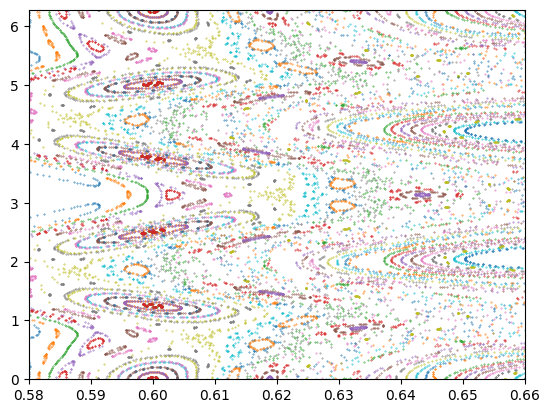

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for hit in pplot._hits:
    ax.scatter(hit[:, 0], hit[:, 1], marker='.', s=0.5)
    # ax.scatter(hit[:, 1], hit[:, 0], marker='.', s=0.5)
ax.set_xlim(0.58, 0.66)
ax.set_ylim(0, 2*np.pi)

In [8]:
pplot.compute_iota()

(array([[0.58  , 0.    ],
        [0.5816, 0.    ],
        [0.5832, 0.    ],
        [0.5848, 0.    ],
        [0.5864, 0.    ],
        [0.588 , 0.    ],
        [0.5896, 0.    ],
        [0.5912, 0.    ],
        [0.5928, 0.    ],
        [0.5944, 0.    ],
        [0.596 , 0.    ],
        [0.5976, 0.    ],
        [0.5992, 0.    ],
        [0.6008, 0.    ],
        [0.6024, 0.    ],
        [0.604 , 0.    ],
        [0.6056, 0.    ],
        [0.6072, 0.    ],
        [0.6088, 0.    ],
        [0.6104, 0.    ],
        [0.612 , 0.    ],
        [0.6136, 0.    ],
        [0.6152, 0.    ],
        [0.6168, 0.    ],
        [0.6184, 0.    ],
        [0.62  , 0.    ],
        [0.6216, 0.    ],
        [0.6232, 0.    ],
        [0.6248, 0.    ],
        [0.6264, 0.    ],
        [0.628 , 0.    ],
        [0.6296, 0.    ],
        [0.6312, 0.    ],
        [0.6328, 0.    ],
        [0.6344, 0.    ],
        [0.636 , 0.    ],
        [0.6376, 0.    ],
        [0.6392, 0.    ],
        [0.6

In [9]:
pplot.iota

array([0.57143286, 0.57693285, 0.5799287 , 0.58333311, 0.58333454,
       0.58823322, 0.59090908, 0.59999852, 0.59999523, 0.59999971,
       0.59999927, 0.59999904, 0.59999965, 0.60000035, 0.60000094,
       0.60000097, 0.60000104, 0.60000289, 0.6031733 , 0.61113657,
       0.61541071, 0.61538753, 0.62242021, 0.62499703, 0.6249994 ,
       0.62499959, 0.64187029, 0.62631483, 0.63636309, 0.66666482,
       0.65885143, 0.66527841, 0.66666212, 0.66666505, 0.66666268,
       0.66666239, 0.66666384, 0.66666617, 0.66666347, 0.66666633,
       0.66666417, 0.66666672, 0.66666657, 0.66666552, 0.66666498,
       0.66666661, 0.66666599, 0.66666524, 0.666666  , 0.66666666,
       0.66666649])

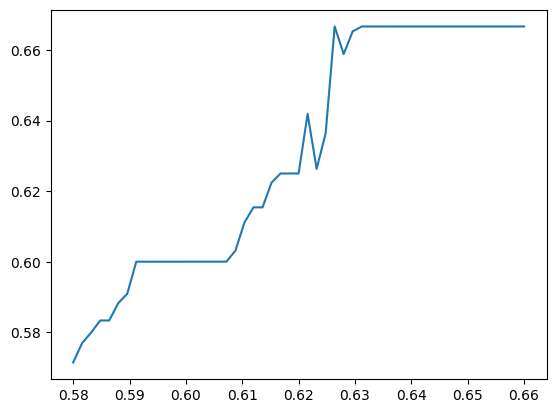

In [10]:
plt.plot(np.linalg.norm(pplot.xs, axis=1), pplot.iota)

## 4. Finding fixed points and plot them

In [11]:
fp58 = FixedPoint(section)
fp35 = FixedPoint(section)

In [12]:
fp58.find_with_iota(5, 8, guess=[0.618, 0], method='1D')

INFO:pyoculus.solvers.fixed_point:Newton 0 - x : [0.618 0.   ]
INFO:pyoculus.solvers.fixed_point:Newton 0 - x_winding : [ 0.61889847 31.31974887]
INFO:pyoculus.solvers.fixed_point:Newton 0 - step: [0.00082507 0.        ]
INFO:pyoculus.solvers.fixed_point:Newton 0 - x_new: [0.61882507 0.        ]
INFO:pyoculus.solvers.fixed_point:Newton 1 - x : [0.61882507 0.        ]
INFO:pyoculus.solvers.fixed_point:Newton 1 - x_winding : [ 0.61880494 31.41866969]
INFO:pyoculus.solvers.fixed_point:Newton 1 - step: [-2.22518147e-05  0.00000000e+00]
INFO:pyoculus.solvers.fixed_point:Newton 1 - x_new: [0.61880281 0.        ]
INFO:pyoculus.solvers.fixed_point:Newton 2 - x : [0.61880281 0.        ]
INFO:pyoculus.solvers.fixed_point:Newton 2 - x_winding : [ 0.6188028 31.4159286]
INFO:pyoculus.solvers.fixed_point:Newton 2 - step: [-1.67478678e-08  0.00000000e+00]
INFO:pyoculus.solvers.fixed_point:Newton 2 - x_new: [0.6188028 0.       ]
INFO:pyoculus.solvers.fixed_point:Newton 3 - x : [0.6188028 0.       ]
IN

In [13]:
fp35.find_with_iota(3, 5, guess=[0.6, 0.], method='1D')

INFO:pyoculus.solvers.fixed_point:Newton 0 - x : [0.6 0. ]
INFO:pyoculus.solvers.fixed_point:Newton 0 - x_winding : [ 0.6        18.84955592]
INFO:pyoculus.solvers.fixed_point:Found fixed point at [0.6 0. ]. Computing additionnal data...


In [14]:
fp35.plot(ax=ax)
fp58.plot(ax=ax)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

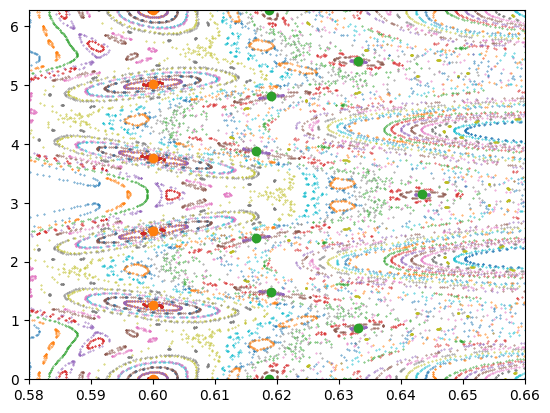

In [15]:
fig

## 5. Greene's Residue and finding flux surfaces

In [16]:
iota = 1/((np.sqrt(5) + 1) / 2)

In [17]:
flux_surface = FluxSurfaceGR(section)
flux_surface.GreeneMethod(iota, fp35, fp58, nexpand=9, method="1D", tol=1e-9, nrestart=4)

INFO:pyoculus.solvers.flux_surface_gr:n1 = 0, m1 = 1, n2 = 1, m2 = 1
INFO:pyoculus.solvers.flux_surface_gr:n1 = 1, m1 = 1, n2 = 1, m2 = 2
INFO:pyoculus.solvers.flux_surface_gr:n1 = 1, m1 = 2, n2 = 2, m2 = 3
INFO:pyoculus.solvers.flux_surface_gr:n1 = 2, m1 = 3, n2 = 3, m2 = 5
INFO:pyoculus.solvers.flux_surface_gr:n1 = 3, m1 = 5, n2 = 5, m2 = 8
INFO:pyoculus.solvers.flux_surface_gr:n1 = 5, m1 = 8, n2 = 8, m2 = 13
INFO:pyoculus.solvers.flux_surface_gr:n1 = 8, m1 = 13, n2 = 13, m2 = 21
INFO:pyoculus.solvers.flux_surface_gr:Searching for the fixedpoint with n = 8, m = 13 at x_guess = [0.61023492 0.        ]
INFO:pyoculus.solvers.fixed_point:Newton 0 - x : [0.61023492 0.        ]
INFO:pyoculus.solvers.fixed_point:Newton 0 - x_winding : [ 0.61150321 49.66290252]
INFO:pyoculus.solvers.fixed_point:Newton 0 - step: [0.00318584 0.        ]
INFO:pyoculus.solvers.fixed_point:Newton 0 - x_new: [0.61342075 0.        ]
INFO:pyoculus.solvers.fixed_point:Newton 1 - x : [0.61342075 0.        ]
INFO:pyocu

In [18]:
flux_surface.plot(ax=ax)

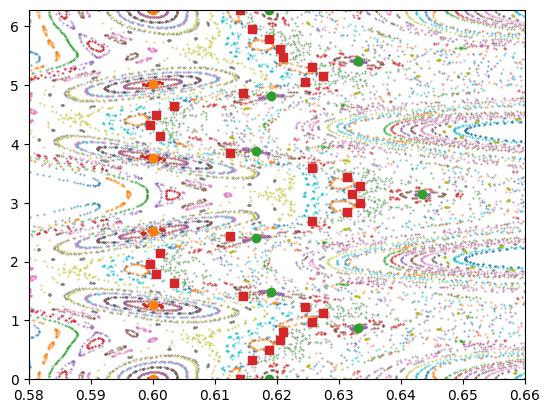

In [19]:
fig

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Order of fixed point', ylabel='Residue'>)

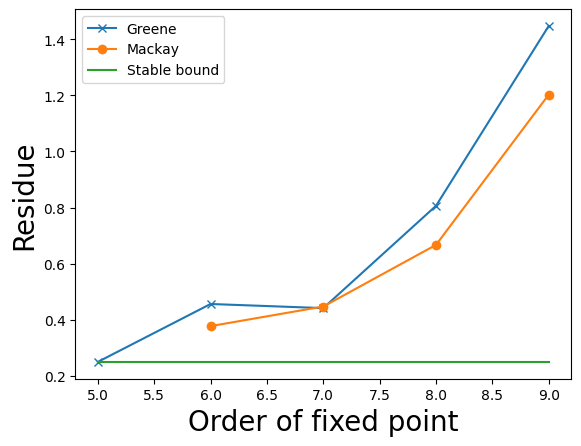

In [20]:
flux_surface.plot_residue()

## 6. Compute the Lyapunov Exponent

In [21]:
# set up the integrator
le = LyapunovExponent(section, nsave=100, every=40)

In [22]:
le.compute(fp58.coords[0])

array([0.0968239 , 0.04787994, 0.05672423, 0.06015238, 0.04790937,
       0.03938852, 0.05433487, 0.0472828 , 0.04194521, 0.05199433,
       0.0469623 , 0.04317539, 0.03998687, 0.04672871, 0.04389313,
       0.04119709, 0.0464344 , 0.04435607, 0.04201382, 0.04697111,
       0.04493406, 0.04292591, 0.04672517, 0.04515368, 0.04334173,
       0.04435122, 0.04531734, 0.04366096, 0.04204435, 0.04544296,
       0.04390996, 0.04251405, 0.04554164, 0.04410343, 0.04288666,
       0.04174333, 0.04421404, 0.04328789, 0.04217421, 0.0429642 ,
       0.04371161, 0.04264552, 0.04338437, 0.04407438, 0.0430487 ,
       0.04209633, 0.04438776, 0.04339309, 0.04253852, 0.04470113,
       0.04375893, 0.04294642, 0.04336804, 0.0440119 , 0.0432879 ,
       0.04252837, 0.04419663, 0.04359021, 0.04284889, 0.04339326,
       0.04391878, 0.04319325, 0.04371851, 0.04421429, 0.04350206,
       0.04401213, 0.0444813 , 0.04377781, 0.04316532, 0.0435709 ,
       0.04401987, 0.04346683, 0.04378253, 0.0442106 , 0.04374

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Log10 Num of iters', ylabel='Log10 Maximal LE'>)

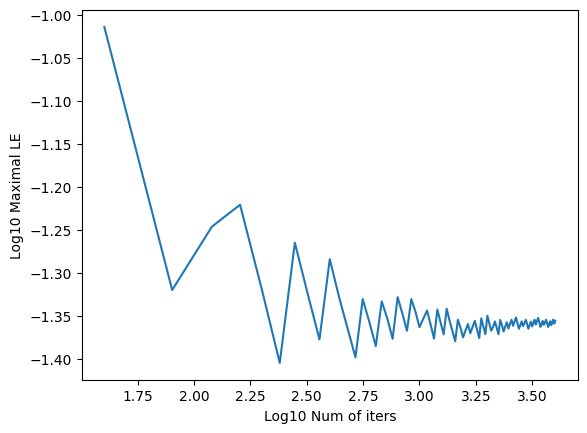

In [23]:
le.plot()

In [24]:
le.compute([0.63, 0])

array([0.02737038, 0.0166278 , 0.0101858 , 0.01364542, 0.01389823,
       0.01356192, 0.01393973, 0.01217701, 0.01350086, 0.01271527,
       0.01270966, 0.01201911, 0.01147194, 0.01066736, 0.0116677 ,
       0.01068724, 0.01090014, 0.01068537, 0.01223155, 0.01199108,
       0.01203483, 0.01192042, 0.01206422, 0.01267497, 0.01285433,
       0.01314515, 0.01340013, 0.01357035, 0.01359831, 0.01381956,
       0.01388615, 0.01364681, 0.01325343, 0.01341896, 0.01274633,
       0.01276889, 0.01278948, 0.01275226, 0.012949  , 0.01284444,
       0.0127548 , 0.01244639, 0.01248639, 0.01232668, 0.01228414,
       0.01216809, 0.01229293, 0.01243766, 0.01272341, 0.01247346,
       0.01263726, 0.0125739 , 0.01300101, 0.01312105, 0.01314516,
       0.01326469, 0.01318633, 0.01304303, 0.01308889, 0.01283886,
       0.0128674 , 0.01287002, 0.01258823, 0.01252507, 0.01254062,
       0.01239129, 0.01222317, 0.01213947, 0.01199473, 0.01192278,
       0.01181563, 0.01159665, 0.01128458, 0.01146138, 0.01132

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Log10 Num of iters', ylabel='Log10 Maximal LE'>)

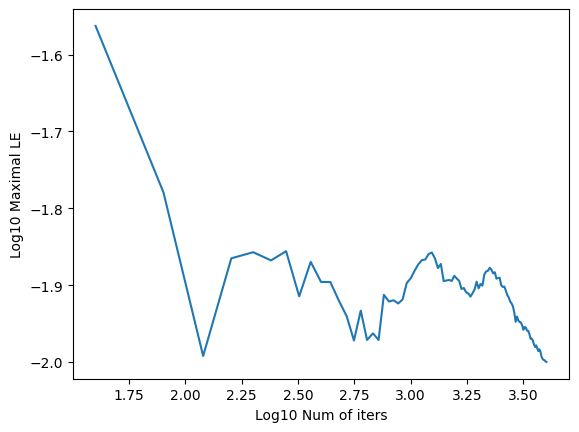

In [25]:
le.plot()

## 7. QFM

In [26]:
qfm = QFM(Mag, pqNtor = 8, pqMpol = 24, nfft_multiplier = 2)

plist = np.array([5, 13, 8, 11, 3])
qlist = np.array([8, 21, 13, 18, 5])
sguess= np.ones(qlist.size) * 0.6
surfaces = qfm.construct_qfms(plist, qlist, sguesslist=sguess, bounding_surfaces=None)

1/5 completed.
2/5 completed.
3/5 completed.
4/5 completed.
5/5 completed.


In [27]:
surfaces.plot(ax=ax, zeta=0, linewidth=1)

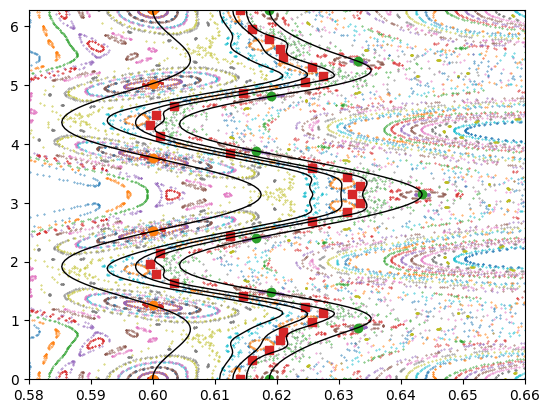

In [28]:
fig